In [1]:
import pandas as pd

data_path = r"C:\Users\OmarFCB\DataWithoutK.csv"
data = pd.read_csv(data_path)

print(data.head())

                  time  proton_vx_gse  proton_vy_gse  proton_vz_gse  \
0  2023-07-01 00:00:00     -495.48570      43.285713     -75.185715   
1  2023-07-01 00:01:00     -492.05713      49.414284     -78.257140   
2  2023-07-01 00:02:00     -488.65555      50.911114     -77.733330   
3  2023-07-01 00:03:00     -488.63750      47.175000     -77.025000   
4  2023-07-01 00:04:00     -488.47775      49.288890     -79.111115   

   proton_vx_gsm  proton_vy_gsm  proton_vz_gsm  proton_speed  proton_density  \
0     -495.48570      50.471428     -70.557144     504.37143        8.134286   
1     -492.05713      56.857143     -73.000000     500.67142       11.822858   
2     -488.65555      58.277780     -72.344444     497.42220       12.968889   
3     -488.63750      54.475000     -72.050000     496.92500       13.030001   
4     -488.47775      56.777780     -73.944440     497.33334       12.640000   

   proton_temperature  hour  dayofweek  quarter  month  year  dayofyear  \
0           24980

In [2]:
import xgboost as xgb
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('model.xgb')


In [3]:
data = data.drop('time', axis=1)


In [4]:
X_test = data.copy()


In [5]:
predictions = loaded_model.predict(X_test)


In [7]:
print (predictions)

[1.9034653 2.220521  2.0777614 ... 2.0685077 1.9116969 1.9349364]


In [ ]:
print(predictions)
# OR
import pandas as pd
pd.DataFrame(predictions, columns=['Predictions']).head()  # To display the first few predictions


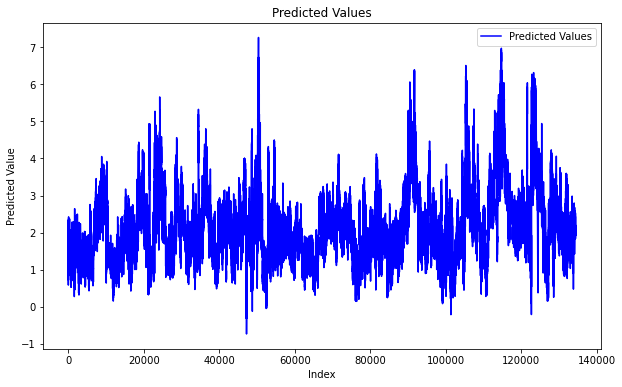

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(predictions, label='Predicted Values', color='blue')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values')
plt.legend()
plt.show()


In [9]:
import pandas as pd
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])


In [10]:
result_df = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)


In [11]:
predictions_df.to_csv('predictions.csv', index=False)


In [12]:
result_df.to_csv('results.csv', index=False)


In [14]:
result_df

,proton_vx_gse,proton_vy_gse,proton_vz_gse,proton_vx_gsm,proton_vy_gsm,proton_vz_gsm,proton_speed,proton_density,proton_temperature,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Predictions
0,-495.48570,43.285713,-75.185715,-495.48570,50.471428,-70.557144,504.37143,8.134286,249805.860,0,5,3,7,2023,182,1,26,1.903465
1,-492.05713,49.414284,-78.257140,-492.05713,56.857143,-73.000000,500.67142,11.822858,281758.720,0,5,3,7,2023,182,1,26,2.220521
2,-488.65555,50.911114,-77.733330,-488.65555,58.277780,-72.344444,497.42220,12.968889,301196.120,0,5,3,7,2023,182,1,26,2.077761
3,-488.63750,47.175000,-77.025000,-488.63750,54.475000,-72.050000,496.92500,13.030001,292071.500,0,5,3,7,2023,182,1,26,2.123371
4,-488.47775,49.288890,-79.111115,-488.47775,56.777780,-73.944440,497.33334,12.640000,289868.220,0,5,3,7,2023,182,1,26,2.027234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134415,-394.67502,-8.675000,-7.066667,-394.67502,-10.141667,-4.741667,394.82498,2.657500,128444.836,23,1,4,10,2023,276,3,40,1.993943
134416,-394.11816,-8.654545,-7.081818,-394.11816,-10.127273,-4.763637,394.29092,2.947272,131934.000,23,1,4,10,2023,276,3,40,1.934936
134417,-394.89090,-19.472727,-6.372727,-394.89090,-20.445454,-1.390909,396.88184,2.500000,137933.900,23,1,4,10,2023,276,3,40,2.068508
134418,-393.37274,-8.636364,-7.072728,-393.37274,-10.109092,-4.727272,393.52725,2.473636,145486.900,23,1,4,10,2023,276,3,40,1.911697


In [15]:
predictions_df

,Predictions
0,1.903465
1,2.220521
2,2.077761
3,2.123371
4,2.027234
...,...
134415,1.993943
134416,1.934936
134417,2.068508
134418,1.911697


In [16]:
def approximate(x): 
    return round(x*3)/3; 

In [17]:
predictions_df['Predictions'] = predictions_df['Predictions'].apply(approximate)


In [18]:
predictions_df

,Predictions
0,2.000000
1,2.333333
2,2.000000
3,2.000000
4,2.000000
...,...
134415,2.000000
134416,2.000000
134417,2.000000
134418,2.000000


In [19]:
predictions_df['Predictions'] = predictions_df['Predictions'].apply(lambda x: round(x, 2))


In [20]:
predictions_df

,Predictions
0,2.00
1,2.33
2,2.00
3,2.00
4,2.00
...,...
134415,2.00
134416,2.00
134417,2.00
134418,2.00


In [23]:
import pandas as pd

data_pathh = r"C:\Users\OmarFCB\K_values.csv"
dataa = pd.read_csv(data_pathh)

print(dataa.head())

     K
0  2.0
1  2.0
2  2.0
3  2.0
4  2.0


In [24]:
result_df = pd.concat([predictions_df, dataa], axis=1)


In [26]:
result_df

,Predictions,K
0,2.00,2.00
1,2.33,2.00
2,2.00,2.00
3,2.00,2.00
4,2.00,2.00
...,...,...
134415,2.00,2.33
134416,2.00,2.33
134417,2.00,2.33
134418,2.00,2.33


In [28]:
result_df['Difference'] = result_df['Predictions'] - result_df['K']


In [29]:
result_df

,Predictions,K,Difference
0,2.00,2.00,0.00
1,2.33,2.00,0.33
2,2.00,2.00,0.00
3,2.00,2.00,0.00
4,2.00,2.00,0.00
...,...,...,...
134415,2.00,2.33,-0.33
134416,2.00,2.33,-0.33
134417,2.00,2.33,-0.33
134418,2.00,2.33,-0.33


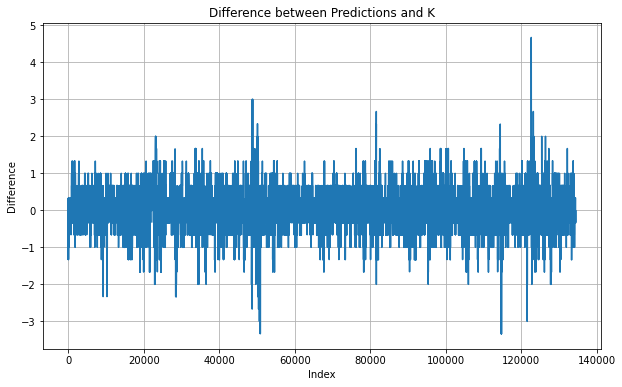

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
result_df['Difference'].plot()
plt.title('Difference between Predictions and K')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True)
plt.show()
